# Criação de um mapa de calor

## Imports

In [48]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

## Inicialização

In [49]:
xsize = ysize = 50
temps = np.zeros((xsize, ysize))

## Funções "helpers"

In [50]:
#função que coloca as temperaturas constantes nos locais corretos
def set_source_sink():
    #usa a variável temps global para essa função
    global temps
    

    #cantos superior e esquerdo são frios
    temps[0]    = -30
    temps[:,0]  = -30

    #cantos inferior e direito são quentes
    temps[-1]   = 30
    temps[:,-1] = 30

    #no encontro dos cantos de duas temperaturas diferentes deixa zero para ser simétrico
    temps[0,-1] = 0
    temps[-1,0] = 0 

    

#função com o plot específico que deve ser criado,
#separado de animate e anim_init pela quantidade de argumentos (que seriam repetidos nas duas funções)
def create_heatmap(frame):
    #usa a variável temps global para essa função
    global temps

    #cria o heatmap em si e depois adiciona um título
    hmap = sns.heatmap(temps, cmap="coolwarm", vmin=-30, vmax=30, xticklabels=False, yticklabels=False, 
                    center=0, square=True, cbar_kws={'label': 'Temperatura (°C)'})
    
    hmap.set_title(f"temperatura no frame {frame}")

## Funções para animação

In [51]:
#função de inicialização, vai rodar no primeiro frame
def anim_init():
    #coloca os valores inicias de temps
    set_source_sink()

    plt.clf()
    #cria o primeiro frame
    create_heatmap(0)
    
    
#máscara dos pesos que coloca os vizinhos do pixel do meio (usado na função abaixo)
mask = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

#função de animação, vai rodar a cada frame mudando a imagem 
def animate(frame):
    #usa as variaveis temps e mask globais para essa função
    global temps
    global mask


    #aplica um filtro na temperatura, ou seja, para cada pixel executa a função de média ponderada (que exclui zeros)
    #do numpy com os pesos iguais a mask (o modo "mirror" diz sobre como a função deve ser aplicada nos cantos, o que é ignorado
    #logo depois, mas esse seria o comportamento caso os cantos não fossem constantes)
    #além disso, esse 0.75 representa a "condutividade" do material, completamente arbitrária
    #isso faz a animação ter um efeito mais realista de aos poucos aumentar ou diminuir a temperatura
    temps += 0.75 * (scipy.ndimage.generic_filter(temps, np.nanmean, footprint=mask, mode="mirror") - temps)

    #coloca os valores constantes da forma que se deve
    #(não encontrei um argumento que fizesse a função de cima "pular" os cantos)
    set_source_sink()


    #limpa a figura do matplotlib
    plt.clf()
    #e desenha o array!
    create_heatmap(frame)


#função que cria a animação em si
def create_heatmap_anim(name, fps, frames):
    global temps
    global xsize
    global ysize

    #reinicializa temps para caso essa função já tenha sido chamada
    temps = np.zeros((xsize, ysize))

    #"figura" que se refere à área de desenho do matplotlib
    fig = plt.figure()
    #cria a animação em si
    anim = animation.FuncAnimation(fig, animate, init_func=anim_init, frames=frames)

    #por algum motivo no colab tentar salvar como gif dá um erro estranho, então usa mp4 mesmo
    anim.save(f"{name}.mp4", writer="ffmpeg", fps=fps)

    #e por último retorna a animação
    return anim

## Fazendo tudo acontecer!

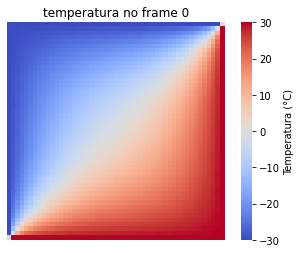

In [52]:
anim = create_heatmap_anim("heatmap", 60, 600)